# Sigorta Ücreti Tahmini - Veri Bilimi Vize Ödevi

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Makine öğrenmesi için gerekli sınıflar
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Veri Yükleme

In [20]:
data = pd.read_csv("medical_insurance_data_cleaned_rev.csv") 
print("İlk 5 satır:\n", data.head())

İlk 5 satır:
    age     sex    bmi         ranking  children smoker     region   charges
0   19  female  27.90      overweight         0    yes  southwest  16884.92
1   18    male  33.77         obesity         1     no  southeast   1725.55
2   28    male  33.00         obesity         3     no  southeast   4449.46
3   33    male  22.71  healthy weight         0     no  northwest  21984.47
4   32    male  28.88      overweight         0     no  northwest   3866.86


Veri Kümesi Hakkında Genel Bilgi

In [21]:
print("\nVeri Tipleri:\n", data.dtypes)
# sayısal mı, kategorik mi?

print("\nEksik Değerler:\n", data.isnull().sum())
print("\nİstatistiksel Bilgiler:\n", data.describe())


Veri Tipleri:
 age           int64
sex          object
bmi         float64
ranking      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

Eksik Değerler:
 age         0
sex         0
bmi         0
ranking     9
children    0
smoker      0
region      0
charges     0
dtype: int64

İstatistiksel Bilgiler:
                age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.664637     1.095737  13279.121638
std      14.044333     6.100204     1.205571  12110.359657
min      18.000000    15.960000     0.000000   1121.870000
25%      27.000000    26.290000     0.000000   4746.340000
50%      39.000000    30.400000     1.000000   9386.160000
75%      51.000000    34.700000     2.000000  16657.720000
max      64.000000    53.130000     5.000000  63770.430000


Kategorik Verileri Sayısala Dönüştürme

In [22]:
# Eksik veri yoktu
# Kategorik verileri sayısal verilere dönüştürmek için LabelEncoder kullanıyoruz
label_enc = LabelEncoder()

# 'sex', 'smoker', 'region' ve 'ranking' kategorik değişkenleri sayısallaştırıyoruz
data['sex'] = label_enc.fit_transform(data['sex'])          # female:0, male:1
data['smoker'] = label_enc.fit_transform(data['smoker'])    # no:0, yes:1
data['region'] = label_enc.fit_transform(data['region'])    # 4 farklı bölge
data['ranking'] = label_enc.fit_transform(data['ranking'])  # healthy < overweight < obesity

Özellikler ve Hedef Ayrımı

In [23]:
# Özellikler (bağımsız değişkenler) ve hedef değişken (bağımlı) olarak ayırıyoruz

X = data.drop('charges', axis=1)  # Girdi verileri (yaş, cinsiyet vs.)
y = data['charges']               # Tahmin edilecek değer

Verilerin Ölçeklenmesi (Standardizasyon)

In [24]:
# Verileri aynı ölçeklere getirmek için standardizasyon uyguluyoruz
# Özellikle mesafe tabanlı algoritmalar için önemli, burada da genelleme amacıyla uygulanıyor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Tüm veriyi standart skala ile dönüştürüyoruz

Eğitim ve Test Seti Ayrımı

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Eğitim ve test verisi olarak %80-%20 oranında ayırıyoruz

Neden random_state=42?
- 42, Douglas Adams'ın meşhur kitabı Otostopçunun Galaksi Rehberinde "hayatın, evrenin ve her şeyin anlamı" olarak geçen sayı. Yazılımcılar arasında standart haline gelmiş bir sayı olduğundan kullanıldı. 🧠

Model Seçimi ve Eğitimi

In [26]:
# RandomForestRegressor: Karmaşık verilerde güçlü tahminler yapabilen bir ensemble (topluluk) yöntemidir
# Özellikle az örnekli ve lineer olmayan yapılar için uygundur
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Model Değerlendirme

In [27]:
# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, y_pred)

# Karekök Ortalama Kare Hata (RMSE) - yorumlaması daha kolay
rmse = np.sqrt(mse)

# Ortalama Mutlak Hata (MAE) - sapmanın mutlak ortalaması
mae = mean_absolute_error(y_test, y_pred)

# R2 Skoru (determinasyon katsayısı) - 1'e ne kadar yakınsa o kadar iyi
r2 = r2_score(y_test, y_pred)

print("\nModel Değerlendirme Metrikleri:")
print(f"R2 Skoru: {r2:.4f}")
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"RMSE (Karekök Ortalama Kare Hata): {rmse:.2f}")


Model Değerlendirme Metrikleri:
R2 Skoru: 0.8834
MAE (Ortalama Mutlak Hata): 2599.20
RMSE (Karekök Ortalama Kare Hata): 4628.38


Sonuçların Yorumlanması

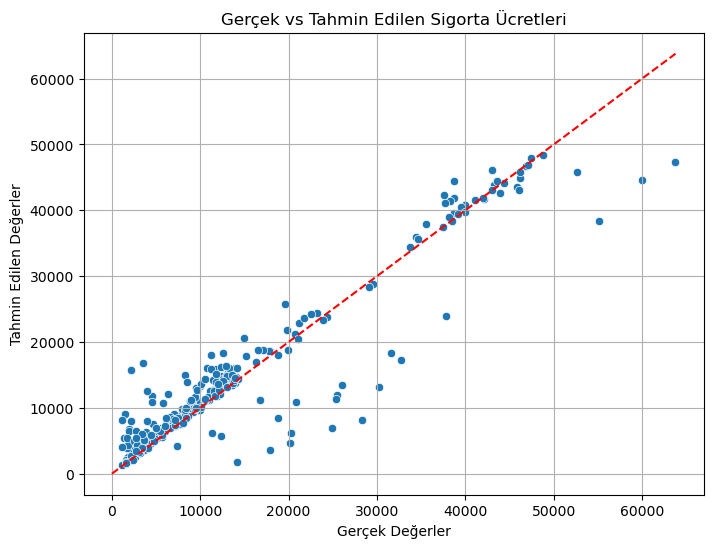

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Sigorta Ücretleri")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.grid()
plt.show()